# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)
6. [Correlations](#correlations)


# Data Description
The original dataset was in a Matlab format. The data was converted to CSV format for easier handling. The self-developed Matlab-Export--Scripts are in the folder [Matlab-Export-Scripts](./MatlabExport).

- The Data are recorded with 240Hz
- The NASA TLX Scores are recorded after each task

The Description of the original data is in the file [Data Description](./readme.txt)

# New Data Format

The new data structure is as follows:
- Participants.csv: Contains the participant information with some demographic data and a unique participant ID.
- Participant_X
    - Test1: 5 Images, no time constraint, no secondary task.
        - Participant_X_Annotations_1.csv: Contains the annotations for the test.
        - Participant_X_Blinks_1.csv: Contains the blinks data for the test.
        - Participant_X_Gaze_1.csv: Contains the gaze data for the test.
        - Participant_X_Pupil_1.csv: Contains the pupil data for the test.
    - Test2: 5 iamges, with time constraint, no secondary task.
    - Test3: 5 images, with time constraint, with secondary task.
    - Test4: 5 images, no time constraint, with secondary task.

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load Data

In [24]:
# Variables
data_path = '../Data/'

# Load data
participant_list = pd.read_csv(data_path + 'participants.csv')
print(participant_list.head())

   ID  VisualAcuity_logMAR_ Gender  Age  Education
0   1                 -0.04      F   28         18
1   2                 -0.10      F   28         18
2   3                 -0.08      F   38         16
3   4                 -0.07      F   29         18
4   5                 -0.15      M   30         18


In [25]:

# initiate an array to store the data
# 47 rows = 74 participants,
# 1. column = Participant ID
# 2.-5. columns = 4 tests

# each test: 
# 1. mental rating
# 2. physical rating
# 3. temporal rating
# 4. performance rating
# 5. effort rating
# 6. frustration rating
# 7. mean rating
# 8. values blinks
# 9. values gaze
# 10. values pupil

# 4 columns = 4 tests
participant_tests = np.zeros((participant_list.shape[0], 5), dtype=object)


# iterate over all participants and tests
for participant_number in range(1, participant_list.shape[0]+1):
    for test_number in range(1, 5):
        path_to_participant = data_path + 'Participant_' + str(participant_number) 
        path_to_test = path_to_participant + '/Test' + str(test_number) + '/'
        path_to_annotations = path_to_test + 'Participant_' + str(participant_number) + '_Annotations_' + str(test_number) + '.csv'
        path_to_blinks = path_to_test + 'Participant_' + str(participant_number) + '_Blinks_' + str(test_number) + '.csv'
        path_to_gaze = path_to_test + 'Participant_' + str(participant_number) + '_Gaze_' + str(test_number) + '.csv'
        path_to_pupil = path_to_test + 'Participant_' + str(participant_number) + '_Pupil_' + str(test_number) + '.csv'
        
        # change the column names of the NASA TLX values in all participants and all tests, so there is no number in the column name
        annotations = pd.read_csv(path_to_annotations)
        annotations.columns = ['mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean']

        participant_tests[participant_number-1][test_number-1] = \
            [participant_number,
            annotations, 
            [pd.read_csv(path_to_blinks)], 
            [pd.read_csv(path_to_gaze)], 
            [pd.read_csv(path_to_pupil)]]


print(participant_tests.shape)
print(participant_tests[:1])


(47, 5)
[[list([1,    mental  physical  temporal  performance  effort  frustration  mean
  0      10         5        15           25      25           10    15, [   id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
  0   1      5437.625617  0.236131    5437.861748                 37     40
  1   2      5444.161561  0.180073    5444.341634                231    233

     end_frame_index  confidence  \
  0               44    0.703872
  1              236    0.553669

                                       filter_response  \
  0  0.5068225043614704 0.5512669488059149 0.595711...
  1  0.5048782729116744 0.5493227173561188 0.592878...

                                             base_data
  0  5437.625617 5437.629564 5437.633621 5437.63786...
  1  5444.161561 5444.165642 5444.169793 5444.17554...  ], [      gaze_timestamp  world_index  confidence  norm_pos_x  norm_pos_y  \
  0        5410.551715            0    0.999499    0.446264    0.846886
  1        5410.5558

In [26]:
print(participant_tests.shape)
print(participant_tests[0].shape)

(47, 5)
(5,)


In [27]:
partcipant_1_test_1 = participant_tests[0][0]
print("Participant ID: " + str(partcipant_1_test_1[0]))
print("Participant NASA TLX Values: " + str(partcipant_1_test_1[1]))
print("Blink Werte: " + str(partcipant_1_test_1[2]))
print("Gaze Werte: " + str(partcipant_1_test_1[3]))
print("Pupil Werte: " + str(partcipant_1_test_1[4]))


Participant ID: 1
Participant NASA TLX Values:    mental  physical  temporal  performance  effort  frustration  mean
0      10         5        15           25      25           10    15
Blink Werte: [   id  start_timestamp  duration  end_timestamp  start_frame_index  index  \
0   1      5437.625617  0.236131    5437.861748                 37     40   
1   2      5444.161561  0.180073    5444.341634                231    233   

   end_frame_index  confidence  \
0               44    0.703872   
1              236    0.553669   

                                     filter_response  \
0  0.5068225043614704 0.5512669488059149 0.595711...   
1  0.5048782729116744 0.5493227173561188 0.592878...   

                                           base_data  
0  5437.625617 5437.629564 5437.633621 5437.63786...  
1  5444.161561 5444.165642 5444.169793 5444.17554...  ]
Gaze Werte: [      gaze_timestamp  world_index  confidence  norm_pos_x  norm_pos_y  \
0        5410.551715            0    0.9994

In [29]:
# generate a new pandas dataframe with data from all participants and all tests
# the columns are: participant_id, test_id, test_duration, mental, physical, temporal, performance, effort, frustration, mean, blinks, gaze, pupil
# blinks, gaze and pupil will be filled in the next steps

# initiate the dataframe
#preprocessed_dict = {'participant_id': [], 'test_id': [], 'test_duration': [], 'mental': [], 'physical': [], 'temporal': [], 'performance': [], 'effort': [], 'frustration': [], 'mean': [], 'blinks': [], 'gaze': [], 'pupil': []}
preprocessed_df = pd.DataFrame(columns=['participant_id', 'test_id', 'test_duration', 'mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean', 'blinks', 'gaze', 'pupil'])

# fill the dataframe with the data from the participants
for n in range(len(participant_tests)):
    participant_n = participant_tests[n]
    participant_id = participant_n[0][0]
    # iterate over all tests of the participant
    for test_iterator in range(len(participant_n)-1):
        # test id is the index of the test in the participant array
        test_id = test_iterator + 1
        test = participant_n[test_iterator]
        # placeholder test duration
        test_duration = 0
        # get the NASA TLX values
        nasa_tlx_values = test[1]
        mental = nasa_tlx_values['mental'][0]
        physical = nasa_tlx_values['physical'][0]
        temporal = nasa_tlx_values['temporal'][0]
        performance = nasa_tlx_values['performance'][0]
        effort = nasa_tlx_values['effort'][0]
        frustration = nasa_tlx_values['frustration'][0]
        mean = nasa_tlx_values['mean'][0]
        # add the data to the dataframe
        new_row_df = pd.DataFrame([{'participant_id': participant_id, 'test_id': test_id, 'test_duration': test_duration, 'mental': mental, 'physical': physical, 'temporal': temporal, 'performance': performance, 'effort': effort, 'frustration': frustration, 'mean': mean}])
        
        preprocessed_df = pd.concat([preprocessed_df, new_row_df], ignore_index=True)
        
  
print(preprocessed_df.head())

  participant_id test_id test_duration mental physical temporal performance  \
0              1       1             0     10        5       15          25   
1              1       2             0     50       30       25          50   
2              1       3             0    100       10       75          80   
3              1       4             0     60       15       45          50   
4              2       1             0     20       10       20          10   

  effort frustration  mean blinks gaze pupil  
0     25          10    15    NaN  NaN   NaN  
1     15          25  32.5    NaN  NaN   NaN  
2     90          20  62.5    NaN  NaN   NaN  
3     20          25  35.8    NaN  NaN   NaN  
4     20          15  15.8    NaN  NaN   NaN  


# Pupil Data
Only use diameter with a high confidence level. <br>
A dialted pupil can be a sign of cognitive load -> <br>
Romano Bergstrom, Jennifer (2014). Eye Tracking in User Experience Design || Physiological Response Measurements., 81–108. <br> 
doi:10.1016/b978-0-12-408138-3.00004-2  

In [47]:
# iterate through all participants and tests
for current_participant in range(len(participant_tests)):
    for i in range(4):
        participant_test = participant_tests[current_participant][i]
        participant_test_pupil = participant_test[4][0]
        # filter the pupil values, so only rows with a confidence level of 0.8 are included
        # if there is a row with the same timestamp, use the one with the higher confidence level
        # save only the columns timestamp, confidence, and diameter and method
        participant_test_pupil_filtered = participant_test_pupil[participant_test_pupil['confidence'] > 0.8]
        participant_test_pupil_filtered = participant_test_pupil_filtered.sort_values('confidence', ascending=False).drop_duplicates('pupil_timestamp').sort_index()
        participant_test_pupil_filtered = participant_test_pupil_filtered[['pupil_timestamp', 'confidence', 'diameter', 'method']]
        # normalize the time, so for each test the time starts at 0
        participant_test_pupil_filtered['pupil_timestamp'] = participant_test_pupil_filtered['pupil_timestamp'] - participant_test_pupil_filtered['pupil_timestamp'].iloc[0]
        participant_tests[current_participant][i][4][0] = participant_test_pupil_filtered


# add the pupil data to the preprocessed dataframe where the participant_id and test_id match, into the column 'pupil'
for n in range(len(participant_tests)):
    participant_n = participant_tests[n]
    participant_id = participant_n[0][0]
    for test_iterator in range(len(participant_n)-1):
        test_id = test_iterator + 1
        test = participant_n[test_iterator]
        test_pupil = test[4][0]
        #print(test_pupil.head())
        new_df = pd.DataFrame(test_pupil, columns=['pupil_timestamp', 'diameter']).reset_index(drop=True)
        
        location = (preprocessed_df['participant_id'] == participant_id) & (preprocessed_df['test_id'] == test_id)
        #print(location)
        # add the data to the dataframe
       # print(preprocessed_df[location].index) 
       # preprocessed_df.at[location, 'pupil'].astype(object)
       # preprocessed_df.at[location, 'pupil'] = new_df.values
       # participant = preprocessed_df.loc[location, 'pupil'] #= new_df
       # print(participant)

# show head the new preprocessed data
#print(preprocessed_df.head())

In [36]:
#calculate the overall time based on the pupil data for each test. the unit is seconds
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_pupil = participant_test[4][0]
    print("Time Test " + str(i+1) + ": " + str(participant_test_pupil['pupil_timestamp'].iloc[-1]) + " seconds")

Time Test 1: 41.93576300004497 seconds
Time Test 2: 22.78008499997668 seconds
Time Test 3: 90.3236039999174 seconds
Time Test 4: 34.180457999929786 seconds


In [37]:
# print each NASA TLX value for each test
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    print(str(participant_test[1]))

   mental  physical  temporal  performance  effort  frustration  mean
0       5         5         5            0      10            5     5
   mental  physical  temporal  performance  effort  frustration  mean
0      10         5         5           45      20           10  15.8
   mental  physical  temporal  performance  effort  frustration  mean
0      50        10        20           50      75           10  35.8
   mental  physical  temporal  performance  effort  frustration  mean
0      50         5        10           10      50            5  21.7


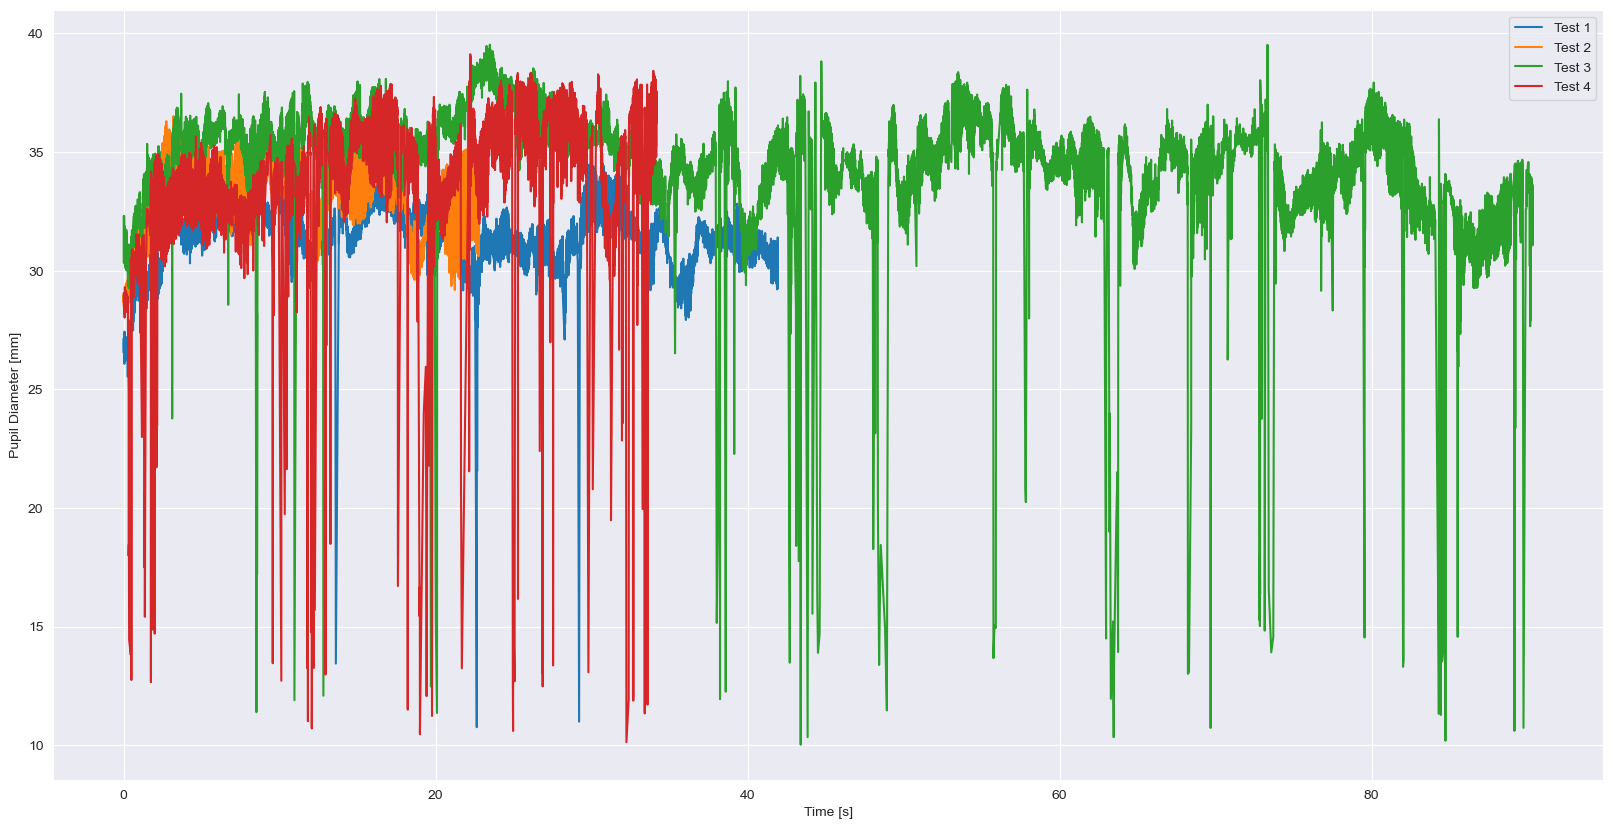

In [38]:
# plot the pupil diameter over time for all tests in one plot in different colors
plt.figure(figsize=(20, 10))
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    plt.plot(participant_test[4][0]['pupil_timestamp'], participant_test[4][0]['diameter'], label='Test ' + str(i+1))
plt.xlabel('Time [s]')
plt.ylabel('Pupil Diameter [mm]')
plt.legend()
plt.show()

# Blink Data
Higher blink rate can be a sign of cognitive load -> <br>
Combining cognitive and visual distraction: Less than the sum of its parts
Yulan Liang, John D. Lee, 2010
doi:10.1016/j.aap.2009.05.001

at least in tasks with visual tasks -> 
Mental Workload and Visual Impairment: Differences between Pupil, Blink, and Subjective Rating <br>
Miguel Ángel Recarte, Elisa Pérez, Ángela Conchillo and Luis Miguel Nunes 
doi:10.1017/S1138741600004406 

In [39]:
current_participant = 46

# only use the columns start_timestamp and end_timestamp, duration and confidence
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_blinks = participant_test[2][0]
    participant_test_blinks_filtered = participant_test_blinks[['start_timestamp', 'end_timestamp', 'duration', 'confidence']]
    participant_tests[current_participant][i][2][0] = participant_test_blinks_filtered


# normalize the time, so for each test the time starts at 0
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_blinks = participant_test[2][0]
    # check if data is not empty
    if participant_test_blinks.shape[0] > 0:
        participant_test_blinks['start_timestamp'] = participant_test_blinks['start_timestamp'] - participant_test_blinks['start_timestamp'].iloc[0]
        participant_test_blinks['end_timestamp'] = participant_test_blinks['end_timestamp'] - participant_test_blinks['end_timestamp'].iloc[0]
        participant_tests[current_participant][i][2][0] = participant_test_blinks
    

# calculate the blink rate for each test. the unit of the timestamp is seconds
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_blinks = participant_test[2][0]
    # check if data is not empty
    if participant_test_blinks.shape[0] > 0:
        print("Blink Rate Test " + str(i+1) + ": " + str(participant_test_blinks.shape[0]/participant_test_blinks['start_timestamp'].iloc[-1]) + " blinks/s")


Blink Rate Test 1: 0.13867721353116103 blinks/s
Blink Rate Test 3: 0.4287775787058696 blinks/s
Blink Rate Test 4: 0.6684684931049978 blinks/s


In [40]:
print(participant_tests[current_participant][0][2][0].head() )

   start_timestamp  end_timestamp  duration  confidence
0         0.000000       0.000000  0.235978    0.671355
1        22.279845      22.267756  0.223889    0.649041
2        27.915851      27.883779  0.203906    0.675658
3        28.843960      28.859745  0.251763    0.634454


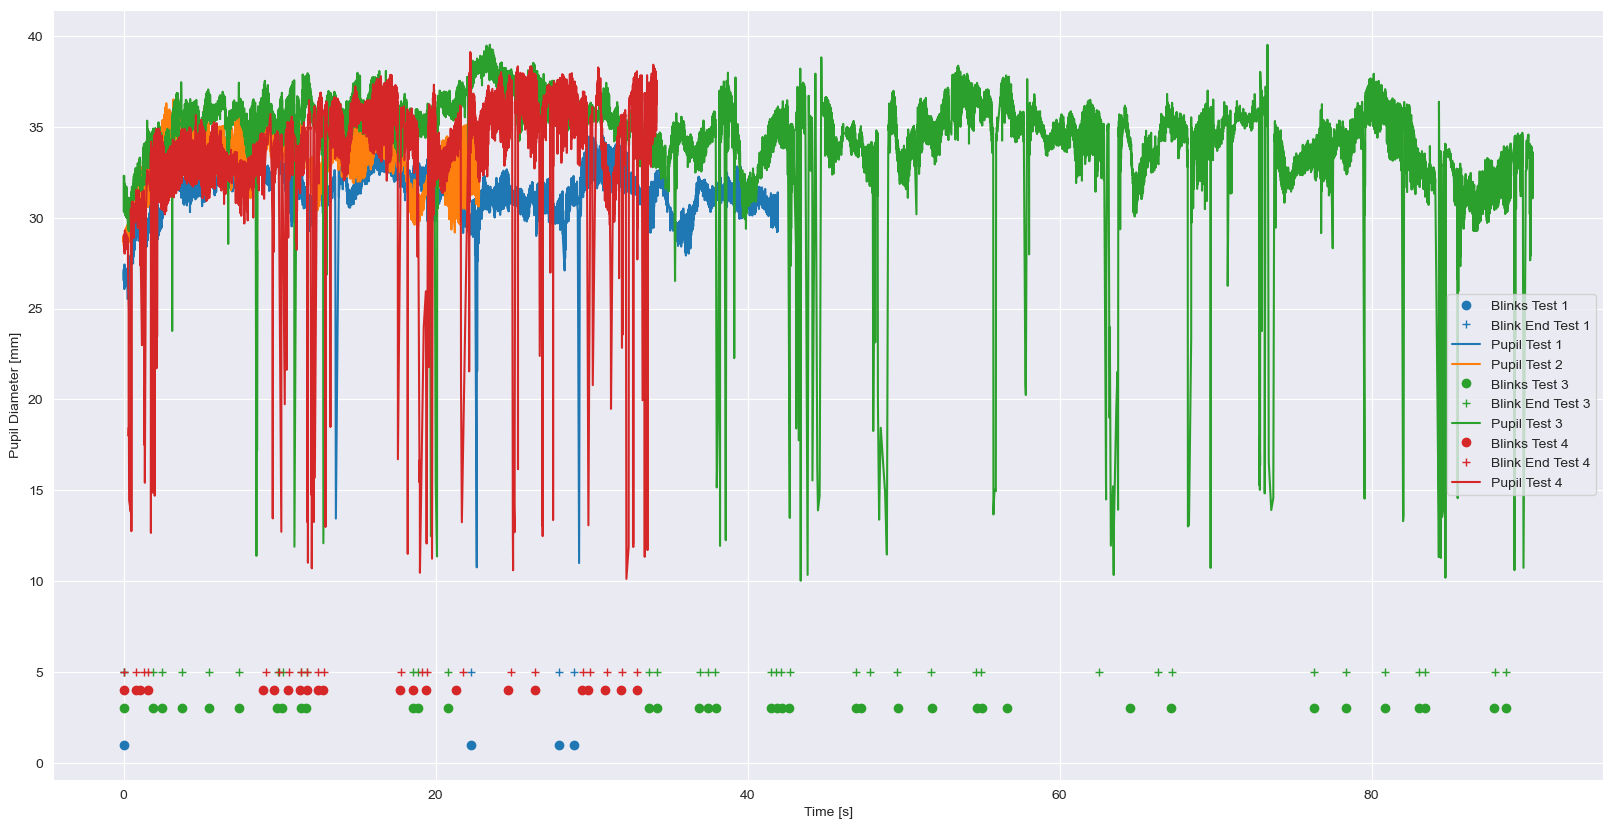

In [41]:
# plot the blink rate over time for all tests in one plot in different colors together with the pupil diameter. the color for all test 1 is red, for all test 2 is green, for all test 3 is blue, and for all test 4 is yellow. show the end of a blink with a cross
plt.figure(figsize=(20, 10))
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_blinks = participant_test[2][0]
    participant_test_pupil = participant_test[4][0]
    if participant_test_blinks.shape[0] > 0:
        plt.plot(participant_test_blinks['start_timestamp'], np.ones(participant_test_blinks.shape[0])*(i+1), 'o', color='C' + str(i), label='Blinks Test ' + str(i+1))
        plt.plot(participant_test_blinks['end_timestamp'], np.ones(participant_test_blinks.shape[0])*5, '+', color='C'+str(i), label='Blink End Test ' + str(i+1))
        
    plt.plot(participant_test_pupil['pupil_timestamp'], participant_test_pupil['diameter'], label='Pupil Test ' + str(i+1))
plt.xlabel('Time [s]')
plt.ylabel('Pupil Diameter [mm]')
plt.legend()
plt.show()




# Gaze Data
Fixations are calculated through PeyeMMV: Python implementation of EyeMMV’s fixation detection algorithm <br> 
https://github.com/krasvas/PeyeMMV <br> 
which is based on EyeMMV toolbox: An eye movement post-analysis tool based on a two-step spatial dispersion threshold for fixation identification <br>
https://bop.unibe.ch/JEMR/article/view/2370 <br>



In [44]:
current_participant = 46

for i in range(4):
    participant_test_gaze = participant_tests[current_participant][i][3][0]
    # filter the gaze values, so only rows with a confidence level of 0.5 are included
    participant_tests[current_participant][i][3][0] = participant_test_gaze[participant_test_gaze['confidence'] > 0.5]

# normalize time starting from 0
# filter data  to gaze_timestamp, confidence, norm_pos_x, norm_pos_y
for i in range(4):
    participant_test_gaze = participant_tests[current_participant][i][3][0]
    participant_test_gaze['gaze_timestamp'] = participant_test_gaze['gaze_timestamp'] - participant_test_gaze['gaze_timestamp'].iloc[0]
    participant_test_gaze_filtered = participant_test_gaze[['gaze_timestamp', 'confidence', 'norm_pos_x', 'norm_pos_y']]
    participant_tests[current_participant][i][3][0] = participant_test_gaze_filtered
    
# remove x or y values that are smaller than 0 or bigger than 1
for i in range(4):
    participant_test_gaze = participant_tests[current_participant][i][3][0]
    participant_test_gaze = participant_test_gaze[(participant_test_gaze['norm_pos_x'] >= 0) & (participant_test_gaze['norm_pos_x'] <= 1) & (participant_test_gaze['norm_pos_y'] >= 0) & (participant_test_gaze['norm_pos_y'] <= 1)]
    participant_tests[current_participant][i][3][0] = participant_test_gaze

    
# calculate the overall time based on the gaze data for each test. the unit is seconds
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_gaze = participant_test[3][0]
    print("Time Test " + str(i+1) + ": " + str(participant_test_gaze['gaze_timestamp'].iloc[-1]) + " seconds")
    # add a column 'test duration' to the original data
    #participant_tests[current_participant][i]['test_duration'] = participant_test_gaze['gaze_timestamp'].iloc[-1]

# show head of gaze data
print(participant_tests[current_participant][0][3][0].head())

Time Test 1: 41.932566500036046 seconds
Time Test 2: 22.789061499992386 seconds
Time Test 3: 90.32741050003096 seconds
Time Test 4: 34.181022500037216 seconds
   gaze_timestamp  confidence  norm_pos_x  norm_pos_y
0        0.000000    0.999188    0.504224    0.624479
1        0.004005    0.999557    0.504859    0.624295
2        0.006801    0.999866    0.504279    0.623092
3        0.010745    0.999771    0.504318    0.623065
4        0.014776    0.999797    0.504625    0.624109


Fixation_ID [X_coord, Y_coord, Duration, Start_time, End_time, No_gaze_points]
1 [0.45594530025002517, 0.613211439778426, 2.246631500078365, 0.004005499999038875, 2.250637000077404, 519]
2 [0.4578886422003632, 0.49439183962940775, 3.5361330000450835, 2.2588760000653565, 5.79500900011044, 869]
3 [0.47407936596432193, 0.4865490539458254, 4.249273999943398, 6.482706000097096, 10.731980000040494, 1054]
4 [0.4737410136929932, 0.5717368931121473, 2.6936354999197647, 12.753298000083305, 15.44693350000307, 603]
5 [0.441808034019463, 0.4604863890884437, 5.983727000071667, 15.454930000007153, 21.43865700007882, 1413]
6 [0.5057171197089576, 0.5742084811620514, 2.892697500064969, 21.446796500007622, 24.33949400007259, 641]
7 [0.43517379532642586, 0.5358284523616694, 1.5034560000058264, 24.707233000081033, 26.21068900008686, 365]
8 [0.474413400894313, 0.5728001590257696, 3.811923500034027, 26.7926940000616, 30.604617500095628, 867]
9 [0.47476507652340794, 0.48421784244784044, 4.002018500003032, 30.

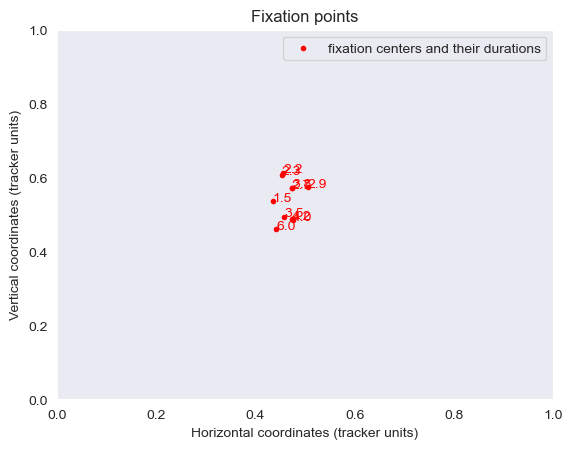

Fixation Rate Test 1: 0.23847812892615108 fixations/s
Fixation_ID [X_coord, Y_coord, Duration, Start_time, End_time, No_gaze_points]
1 [0.4805181908131031, 0.5512258504250949, 2.9439159999601543, 0.0037589999847114086, 2.9476749999448657, 721]
2 [0.490417117623525, 0.572574216580353, 1.4838844999903813, 3.2078700000420213, 4.691754500032403, 320]
3 [0.4864863541447261, 0.43224694100400307, 2.683767499984242, 4.700024500023574, 7.383792000007816, 614]
4 [0.49067510150280486, 0.567811526810482, 1.1821375000290573, 7.391676499973983, 8.57381400000304, 294]
5 [0.45617343259555226, 0.4671375466462697, 3.1213814999209717, 8.582456000032835, 11.703837499953806, 733]
6 [0.47650534132587496, 0.4767980510373969, 5.354195500025526, 12.583798000006936, 17.937993500032462, 1272]
7 [0.4757884351901469, 0.5674814493131122, 2.3578240000642836, 17.94599749997724, 20.303821500041522, 577]


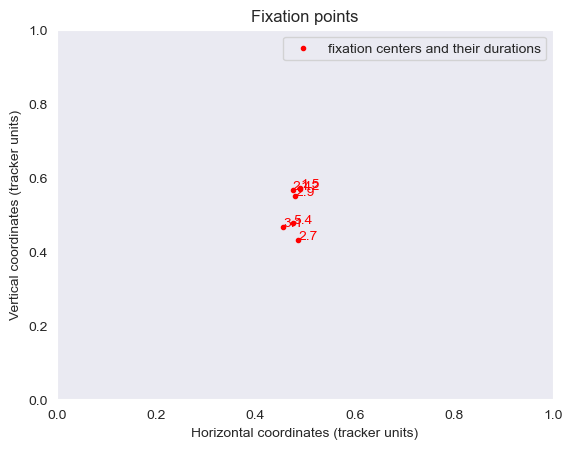

Fixation Rate Test 2: 0.30716490891923476 fixations/s
Fixation_ID [X_coord, Y_coord, Duration, Start_time, End_time, No_gaze_points]
1 [0.4652245863740432, 0.5325524832360303, 5.3833894999697804, 2.907365999999456, 8.290755499969237, 1165]
2 [0.4784062000851027, 0.5488294902203257, 2.5984044999349862, 8.591474000015296, 11.189878499950282, 595]
3 [0.4683095888183844, 0.523262675950351, 3.309404000057839, 19.61526899994351, 22.92467300000135, 690]
4 [0.42857599254641443, 0.5135831879812808, 1.0476120000239462, 23.65994799998589, 24.707560000009835, 260]
5 [0.5305069326671227, 0.5762896347628492, 2.9800089999334887, 24.863289000000805, 27.843297999934293, 728]
6 [0.46283411061202767, 0.522843536964197, 4.839087500004098, 27.85134549997747, 32.69043299998157, 1194]
7 [0.442540882008287, 0.6102020016812068, 1.1406000000424683, 33.58667599991895, 34.72727599996142, 239]
8 [0.4896507918066903, 0.5904030190737508, 3.1324680000543594, 34.839351999922656, 37.971819999977015, 737]
9 [0.495095676

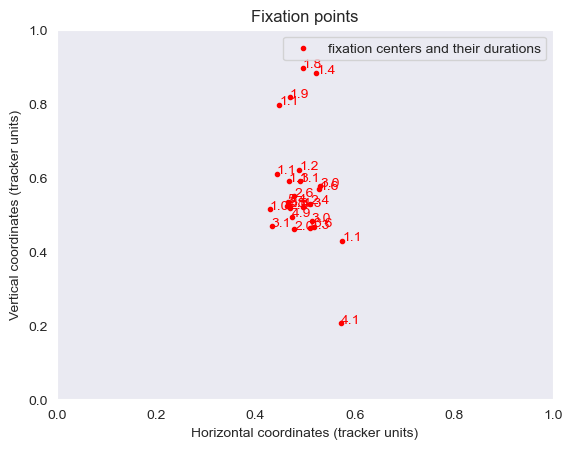

Fixation Rate Test 3: 0.28784175098201326 fixations/s
Fixation_ID [X_coord, Y_coord, Duration, Start_time, End_time, No_gaze_points]
1 [0.4854960613934531, 0.4922654095079318, 5.558824999956414, 0.0, 5.558824999956414, 1133]
2 [0.450126114892197, 0.40556837432757653, 2.3122930000536144, 5.994756000000052, 8.307049000053667, 572]
3 [0.45680446640252326, 0.5076419720039026, 2.8227140000090003, 9.410200500045903, 12.232914500054903, 399]
4 [0.4924478893430991, 0.46992610413998714, 4.092635000008158, 12.945167499943636, 17.037802499951795, 955]
5 [0.4790211045981511, 0.5468239713684178, 1.4256125000538304, 18.231224999995902, 19.656837500049733, 180]
6 [0.45924756682862566, 0.4111206631233899, 1.073145000031218, 19.978865499957465, 21.052010499988683, 260]
7 [0.4932418553246271, 0.39878429177884644, 1.2237929999828339, 22.264705499983393, 23.488498499966227, 298]
8 [0.4840895519905814, 0.49345968922465305, 1.2598879999713972, 23.640745499986224, 24.90063349995762, 308]
9 [0.496349349589119

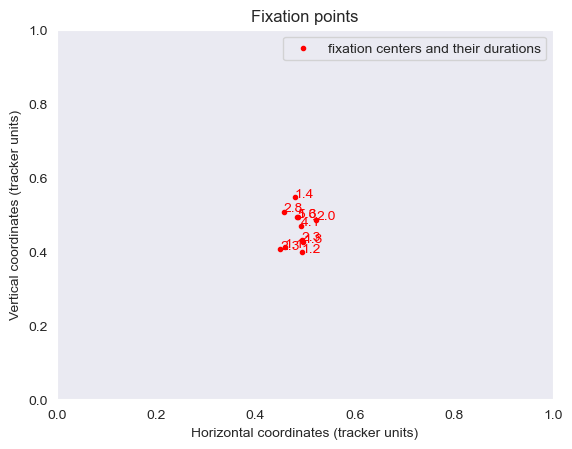

Fixation Rate Test 4: 0.3218160018468735 fixations/s


In [47]:
import peyemmv
# force reload of package
import importlib
importlib.reload(peyemmv)

current_participant = 46
gaze_test1 = participant_tests[current_participant][3][3][0]

#pygazeanalyser.detectors.fixation_detection(gaze_test1['norm_pos_x'], gaze_test1['norm_pos_y'], gaze_test1['gaze_timestamp'], maxdist=2.5)

# create a gazelist in following order: norm_pos_x, norm_pos_y, gaze_timestamp
gaze_data = gaze_test1[['norm_pos_x', 'norm_pos_y', 'gaze_timestamp']].values.tolist()

result = peyemmv.extract_fixations_list(gaze_data, 0.1, 0.1, 1, '0')

# calculate the fixationrate for each test. the unit of the timestamp is seconds
for i in range(4):
    participant_test = participant_tests[current_participant][i]
    participant_test_gaze = participant_test[3][0]
    gaze_data = participant_test_gaze[['norm_pos_x', 'norm_pos_y', 'gaze_timestamp']].values.tolist()
    result = peyemmv.extract_fixations_list(gaze_data, 0.1, 0.1, 1, '1')
    print("Fixation Rate Test " + str(i+1) + ": " + str(len(result)/participant_test_gaze['gaze_timestamp'].iloc[-1]) + " fixations/s")
    
    

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [ ]:

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('your_dataset.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [ ]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
